In [10]:
# Task 1

#importing module
import pandas as pd

#Loading data
df= pd.read_csv("ship_data.csv")

#Checking data
df.head()

,MMSI,Speed (knots),COG (degrees),Destination,Ship type,Gross tonnage,Length (m),Breadth (m)
0,236039000,10.1,74.9,Hamina,Cargo,2280,82.6,12.3
1,440363000,9.9,74.6,Hamina,Cargo,8521,136.0,32.0
2,235009040,8.4,65.8,Hamina,Cargo,3978,1000.0,16.5
3,246591000,9.2,74.6,Hamina,Cargo,8620,137.1,19.1
4,305929000,9.6,73.2,Hamina,Cargo,1905,87.9,11.4


In [2]:
df['Ship type'].values

array(['Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tank

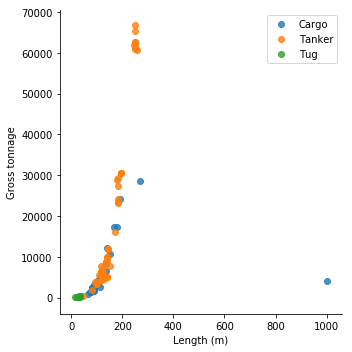

In [11]:
# Plotting a scatter plot using ship length and gross tonnage, using a different color for each ship type.

import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot( x="Length (m)", y="Gross tonnage", data=df, fit_reg=False, hue='Ship type', legend=False, scatter=True)
plt.legend(loc='upper right')

plt.show()
 

In [12]:
# Are there any evident outliers? If so, delete the outliers 
# (or alternatively you can try to find the correct value from marinetraffic.com). 
# Do you need to use some transformation? If so, make the transformation.

# Finding outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


     Breadth (m)  COG (degrees)  Destination  Gross tonnage  Length (m)  \
0          False          False         True          False       False   
1          False          False         True          False       False   
2          False          False         True          False        True   
3          False          False         True          False       False   
4          False          False         True          False       False   
5          False          False         True          False       False   
6          False          False         True          False       False   
7          False          False         True          False       False   
8          False          False         True          False       False   
9          False          False         True          False       False   
10         False          False         True          False       False   
11         False          False         True          False       False   
12         False         

In [13]:
# Removing outliers

df_removed_outlier=df.drop([2,48,60,80,82,83,90,91,93,96,97], axis=0)


In [33]:
import numpy as np
df_encoded = pd.concat([df_removed_outlier,pd.get_dummies(df_removed_outlier['Destination'], dummy_na=False)],axis=1).drop(['Destination'],axis=1)
X_c= np.array(df_encoded.loc[:,'Hamina':])

X_c=pd.DataFrame(X_c.astype('float64'))


In [40]:
# The numerical variables have quite different ranges so it is good to make a Zscore standardization. 
# Perform it for speed, length, breadth and gross tonnage.

#Importing necessary module
from sklearn import preprocessing
x = df_encoded[['Speed (knots)','Gross tonnage','Length (m)','Breadth (m)']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
X=np.array(x_scaled)
X=np.hstack([X, X_c])




[0.8275862068965517, 0.7241379310344828, 0.8620689655172413, 0.7586206896551724, 0.6896551724137931, 0.8620689655172413, 0.8275862068965517, 0.8275862068965517, 0.7931034482758621, 0.8275862068965517, 0.896551724137931, 0.8620689655172413, 0.896551724137931, 0.7931034482758621, 0.7931034482758621, 0.7931034482758621, 0.7931034482758621, 0.7241379310344828, 0.8620689655172413, 0.9310344827586207, 0.8620689655172413, 0.7241379310344828, 0.8620689655172413, 0.7586206896551724, 0.896551724137931, 0.7931034482758621, 0.8275862068965517, 0.8275862068965517, 0.6896551724137931, 0.8275862068965517, 0.7931034482758621, 0.9655172413793104, 0.8620689655172413, 0.7586206896551724, 0.8275862068965517, 0.896551724137931, 0.7931034482758621, 0.6896551724137931, 0.7586206896551724, 0.8620689655172413, 0.7931034482758621, 0.7931034482758621, 0.8620689655172413, 0.7586206896551724, 0.8275862068965517, 0.8275862068965517, 0.7931034482758621, 0.8275862068965517, 0.9310344827586207, 0.6206896551724138, 0.7

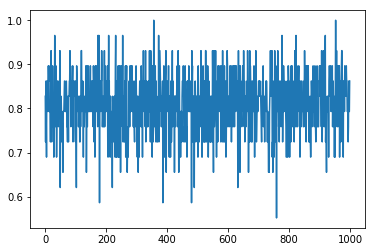

In [45]:
#Task 2. Predict the ship type with the speed, destination, length, breadth and gross tonnage data using kNN classifier with k=3.
#Find an estimation for the classification accuracy using random training and test sets. 

# Importing necessary module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
# Feature and the response variable
y = df_encoded['Ship type'].values
X = X


# Divide the data randomly into training (70 %) and test sets (30 %). Should you use stratification? Why? 

#Importing necessary module
from sklearn.model_selection import train_test_split


# Split into training and test set

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
#for i in X_train, X_test, y_train, y_test:
    # Create a k-NN classifier with 3 neighbors: knn
   # knn = KNeighborsClassifier(n_neighbors=3)
    # Fit the classifier to the training data
    #knn.fit(X_train, y_train)
    #k_score=knn.score(X_test, y_test)
    #print k_score
    
k_score=[]


for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=3)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    k_score.append(score)
print k_score
    

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_score)
plt.show()

    

In [49]:
# Task 3: Predict the ship type with the speed, destination, length, breadth and gross tonnage data 
# using kNN classifier with k=3. Find an estimation of the classification accuracy using leave-one-out. 
 
#Importing necessary module
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

score=[]

for train, test in loo.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores=accuracy_score(y_test, y_pred)
    #knn.fit(X,y)
    #y_pred=knn.predict(X)
    #scores=accuracy_score(y,y_pred)
    score.append(scores)
np.mean(score)



0.8541666666666666

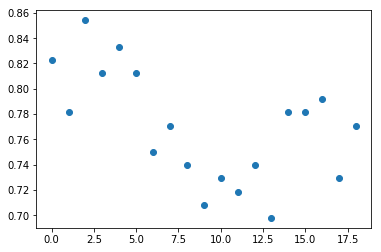

In [55]:
# Find the optimal value for k
accuracy=[]

for i in range(1,20):
    score=[]
    for train, test in loo.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores=accuracy_score(y_test, y_pred)
        score.append(scores)
    accuracy.append(np.mean(score))
plt.plot(accuracy, 'o')
plt.show()


# The optimal value of k is: 3
Classifiaction accuracy: approx 85%

Comparing Task 2 and 3: We have got better result in task 3 because the data was sorted by leave one out meaning that each data was used as testing data and the remaining ones were used as training. Also, in task 2, we used randomly selected training and test sets which results in poor accuracy.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.show()

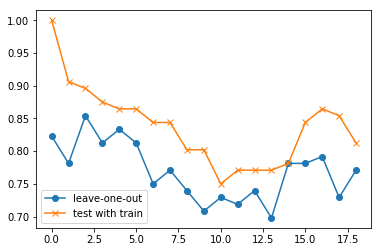

In [60]:
#Task 4: Predict the ship type with the speed, destination, length and gross tonnage data using kNN classifier with k=1..20.
#Use all ships in the preprocessed data for training. Use the same training data also to test the classifier. 
#Find an estimation for the classification accuracy. Plot the classification accuracy with different k values 
#acquired with leave-one-out and using training data in the same figure. Comment your result. 
#Why shouldn’t you test with your training data?

# Feature and the response variable
y = df_encoded['Ship type'].values
X=X

accu=[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    w=accuracy_score(y, y_pred)
    accu.append(w)
        
plt.plot(accuracy,marker='o', label= 'leave-one-out')
plt.plot(accu,marker='x', label= 'test with train')
plt.legend(loc='lower left')
plt.show()



# Comment:
Training with testing data doesn't give the best result compared to leave one out. Testing with training data can be an example of overfitting.It is difficult to generalize the data with train-test sets. 